In [0]:
from google.colab import files
uploaded = files.upload()

Saving can_yeni.xlsx to can_yeni.xlsx


In [0]:
!pip install pyyaml h5py

In [0]:
import io
import pandas as pd
import numpy as np

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
data = pd.read_excel(io.BytesIO(uploaded['can_yeni.xlsx']))
data = data.fillna(data.mean())

In [0]:
data

,Tarih,PM10,SO2,NO2,O3,Sebze
0,2019-05-01 00:00:56,55.930000,10.800000,6.25,44.340000,616
1,2019-05-02 00:00:56,34.140000,18.180000,6.42,41.180000,662
2,2019-05-03 00:00:56,126.610000,39.710000,7.38,33.860000,594
3,2019-05-04 00:00:56,61.400000,27.260000,9.89,37.600000,728
4,2019-05-05 00:00:56,74.090000,18.750000,6.42,40.150000,602
...,...,...,...,...,...,...
115,2019-08-24 00:00:56,44.700000,2.900000,1.61,95.510000,596
116,2019-08-25 00:00:56,44.780000,5.110000,1.81,104.700000,626
117,2019-08-26 00:00:56,44.470000,5.260000,2.04,108.540000,604
118,2019-08-27 00:00:56,45.807407,17.028585,5.05,73.647944,752


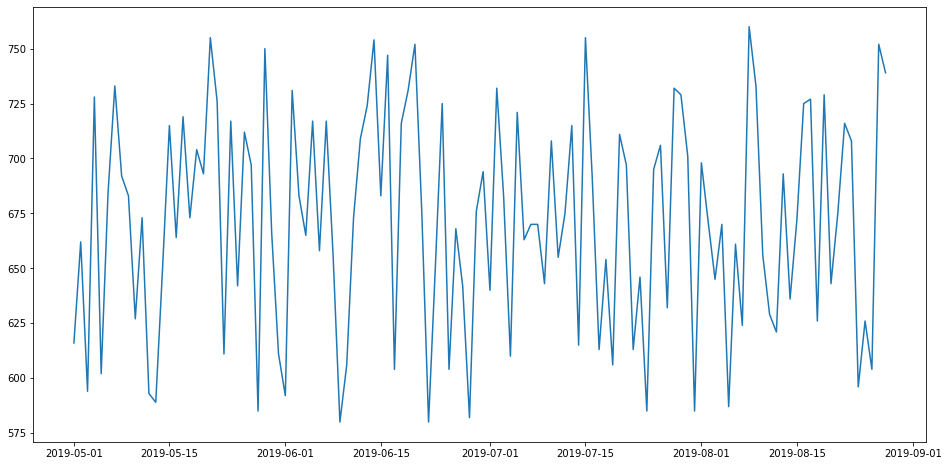

In [0]:
plt.figure(figsize=(16,8))
plt.plot(data.Tarih,data.Sebze)
plt.show()

In [0]:
data = data.filter(['Sebze'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.70)
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [0]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
len(train_data)

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
#LSTM AĞ MODELİ 
model = Sequential()   
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=2, epochs=90)         #modeli eğit

test_data = scaled_data[training_data_len - 60: , : ]    #test veri kümesi

Epoch 1/90
24/24 [==============================] - 1s 57ms/step - loss: 0.1025 - accuracy: 0.0000e+00
Epoch 2/90
24/24 [==============================] - 1s 22ms/step - loss: 0.0632 - accuracy: 0.0000e+00
Epoch 3/90
24/24 [==============================] - 1s 22ms/step - loss: 0.0512 - accuracy: 0.0000e+00
Epoch 4/90
24/24 [==============================] - 1s 22ms/step - loss: 0.0640 - accuracy: 0.0000e+00
Epoch 5/90
24/24 [==============================] - 1s 22ms/step - loss: 0.0570 - accuracy: 0.0000e+00
Epoch 6/90
24/24 [==============================] - 1s 23ms/step - loss: 0.0578 - accuracy: 0.0000e+00
Epoch 7/90
24/24 [==============================] - 1s 22ms/step - loss: 0.0615 - accuracy: 0.0000e+00
Epoch 8/90
24/24 [==============================] - 1s 22ms/step - loss: 0.0548 - accuracy: 0.0000e+00
Epoch 9/90
24/24 [==============================] - 1s 22ms/step - loss: 0.0572 - accuracy: 0.0000e+00
Epoch 10/90
24/24 [==============================] - 1s 22ms/step - loss:

In [0]:
#x ve y test veri kümeleri  oluştur
x_test = []    
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [0]:
x_test = np.array(x_test)  #x sayısal değere dönüştürür
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))   # Verileri LSTM tarafından kabul edilen şekle dönüştürün

predictions = model.predict(x_test)    #tahmin işlemleri
predictions = scaler.inverse_transform(predictions)

In [0]:
#rms değerini hesapla
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


51.8018317380519

In [0]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Tahmin'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model',fontsize=20)
plt.xlabel('Tarih', fontsize=20)
plt.ylabel('Sebze', fontsize=20)
plt.plot(train['Sebze'])
plt.plot(valid[['Sebze', 'Tahmin']])
plt.legend(['Eğitim', 'Veri', 'Tahmin'], loc='lower right')
plt.show()

In [0]:
valid

,Sebze,Tahmin
84,585,664.837158
85,695,686.099854
86,706,671.807312
87,632,651.601624
88,732,660.852478
89,729,638.088196
90,701,619.617126
91,585,617.944763
92,698,661.242432
93,671,659.014404
